In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_data = pd.read_csv('BostonHousing.csv') #read the data


In [2]:
my_data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
#we need to normalize the features using mean normalization
my_data = (my_data - my_data.min())/(my_data.max()- my_data.min())
my_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [4]:
#panda---->numpy
#setting the matrixes
X = my_data.iloc[:,0:13]#right now size (507,14)----->on concatenating (507,15)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)#axis=1 means column

y = my_data.iloc[:,13:14].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,14])

#set hyper parameters
alpha = 0.01
iters = 1000

In [5]:
theta.shape

(1, 14)

In [6]:
X

array([[1.00000000e+00, 0.00000000e+00, 1.80000000e-01, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [1.00000000e+00, 2.35922539e-04, 0.00000000e+00, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [1.00000000e+00, 2.35697744e-04, 0.00000000e+00, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [1.00000000e+00, 6.11892474e-04, 0.00000000e+00, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.00000000e+00, 1.16072990e-03, 0.00000000e+00, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [1.00000000e+00, 4.61841693e-04, 0.00000000e+00, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [7]:
y.shape

(506, 1)

In [8]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [9]:
computeCost(X,y,theta)

0.09674539598887426

In [10]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)#axis=0 means row
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)
print(g.shape)



[[ 0.18035342 -0.02742563  0.08975673 -0.03792632  0.06744328 -0.01894975
   0.22379663  0.02141224  0.04950213 -0.02466044 -0.04841213 -0.04303519
   0.1843233  -0.12688483]]
0.010180402114249714
(1, 14)


Text(0.5, 1.0, 'Error vs. Training Epoch')

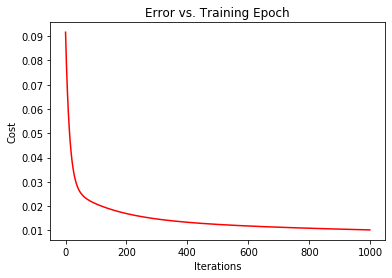

In [11]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  


In [22]:
predictions=np.dot(g,X.T)
predictions


array([[0.49479274, 0.45297461, 0.49781024, 0.49988099, 0.50079841,
        0.47018511, 0.43352769, 0.42570807, 0.36142458, 0.42157645,
        0.42927313, 0.43764654, 0.40781753, 0.4037127 , 0.39906589,
        0.39534282, 0.39608546, 0.38062719, 0.31069723, 0.37842145,
        0.33705445, 0.38571005, 0.37848473, 0.36165657, 0.37899581,
        0.32043824, 0.37179979, 0.33897147, 0.41307248, 0.41742838,
        0.33114588, 0.38867978, 0.26028374, 0.34304614, 0.3018304 ,
        0.40788306, 0.38746142, 0.4042007 , 0.39988816, 0.53644247,
        0.56170178, 0.46460085, 0.43529652, 0.43651739, 0.42808285,
        0.40849216, 0.39904144, 0.40543995, 0.34123205, 0.39473724,
        0.44294686, 0.46662969, 0.49025973, 0.45730014, 0.45072754,
        0.59670413, 0.55574194, 0.600739  , 0.45479922, 0.44009036,
        0.42301901, 0.42439496, 0.47735424, 0.4781787 , 0.52260737,
        0.53351296, 0.49537229, 0.42546563, 0.39950895, 0.42620699,
        0.42324357, 0.3918519 , 0.41595161, 0.40

In [13]:
x_trainnum=0.8*(X.shape[0])
x_testnum=0.2*(X.shape[0])
print(x_trainnum)
print(x_testnum)

404.8
101.2


In [14]:
trainnum=405
testnum=101

In [15]:
x_train=my_data.iloc[0:405,0:13]
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)#axis=1 means column

y_train=my_data.iloc[0:405,13:14].values
x_test=my_data.iloc[405:507,0:13]
ones = np.ones([x_test.shape[0],1])
x_test = np.concatenate((ones,x_test),axis=1)#axis=1 means column
y_test=my_data.iloc[405:507,13:14].values
print(X.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(theta.shape)

(506, 14)
(506, 1)
(405, 14)
(101, 14)
(405, 1)
(101, 1)
(1, 14)


In [16]:
computeCost(x_train,y_train,theta)

0.11164804755372656

In [17]:
def gradientDescent(x_train,y_train,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)#axis=0 means row
        cost[i] = computeCost(x_train,y_train, theta)
    
    return theta,cost

#running the gd and cost function
g1,cost1 = gradientDescent(x_train,y_train,theta,iters,alpha)
print(g1)

finalCost = computeCost(x_train,y_train,g)
print(finalCost)


[[ 0.18035342 -0.02742563  0.08975673 -0.03792632  0.06744328 -0.01894975
   0.22379663  0.02141224  0.04950213 -0.02466044 -0.04841213 -0.04303519
   0.1843233  -0.12688483]]
0.011759750188475242


In [18]:
predictions=np.dot(g1,x_train.T)
p=predictions.T#predicted
t=y_train#actual test data
print(p)
print(t)


[[0.49479274]
 [0.45297461]
 [0.49781024]
 [0.49988099]
 [0.50079841]
 [0.47018511]
 [0.43352769]
 [0.42570807]
 [0.36142458]
 [0.42157645]
 [0.42927313]
 [0.43764654]
 [0.40781753]
 [0.4037127 ]
 [0.39906589]
 [0.39534282]
 [0.39608546]
 [0.38062719]
 [0.31069723]
 [0.37842145]
 [0.33705445]
 [0.38571005]
 [0.37848473]
 [0.36165657]
 [0.37899581]
 [0.32043824]
 [0.37179979]
 [0.33897147]
 [0.41307248]
 [0.41742838]
 [0.33114588]
 [0.38867978]
 [0.26028374]
 [0.34304614]
 [0.3018304 ]
 [0.40788306]
 [0.38746142]
 [0.4042007 ]
 [0.39988816]
 [0.53644247]
 [0.56170178]
 [0.46460085]
 [0.43529652]
 [0.43651739]
 [0.42808285]
 [0.40849216]
 [0.39904144]
 [0.40543995]
 [0.34123205]
 [0.39473724]
 [0.44294686]
 [0.46662969]
 [0.49025973]
 [0.45730014]
 [0.45072754]
 [0.59670413]
 [0.55574194]
 [0.600739  ]
 [0.45479922]
 [0.44009036]
 [0.42301901]
 [0.42439496]
 [0.47735424]
 [0.4781787 ]
 [0.52260737]
 [0.53351296]
 [0.49537229]
 [0.42546563]
 [0.39950895]
 [0.42620699]
 [0.42324357]
 [0.39

In [19]:
#train accuracy
c=0
for i in range(0,405):
    if(p[i,0]==t[i,0]):
        c=c+1
print(c)        
acc=(c/405)*100;


0


In [20]:
acc

0.0